# Supervised learning

This notebook will test supervised learning, and more specifically LinearRegression, and evaluate its performance

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Reading of the train and test sets defined in 3-scaling
df_train = pd.read_csv("../data/train_normalised.csv")
df_test = pd.read_csv("../data/test_normalised.csv")


For supervised learning, we will only keep labelled data, which is what is done in the following part

In [6]:
target = "YieldStrength"

# Definition of X_train and y_train
X_train = df_train.drop(columns=[target])
y_train = df_train[target]

X_test  = df_test.drop(columns=[target])
y_test  = df_test[target]

# Masks for labelled data
mask_labelled   = y_train.notna()

X_train_labelled   = X_train.loc[mask_labelled].copy()
y_train_labelled   = y_train.loc[mask_labelled].copy()


We will here test 2 different supervised learning method : 
* **Random Forest Regressor**
* **Gradient Boosting Regressor**

We will evaluate their performance based on :
* **Graphs** : How close the predicted values of the YieldStrength are to the observed values of the YieldStrength; 
* **R²** : the closest to 1, the better the model, as it means that the model encapsulate the variance well
* **Mean Squared Error** : the smaller the better, as it will mean that great errors rarely exist
* **Mean Absolute Error** : the smaller the better, it shows how close the model predicts the Yield Strength

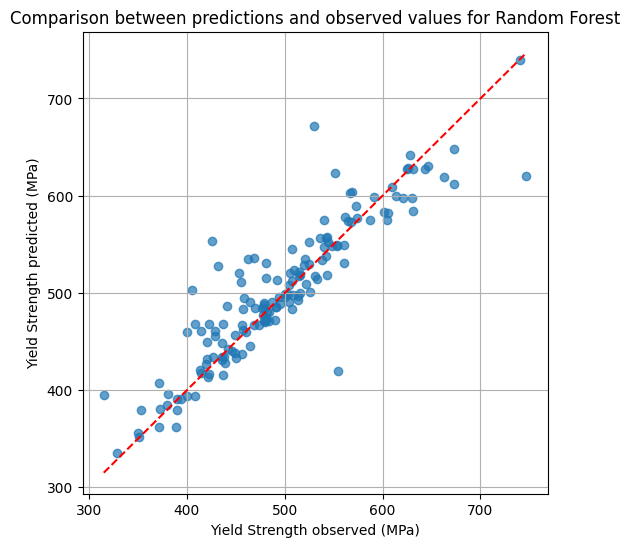

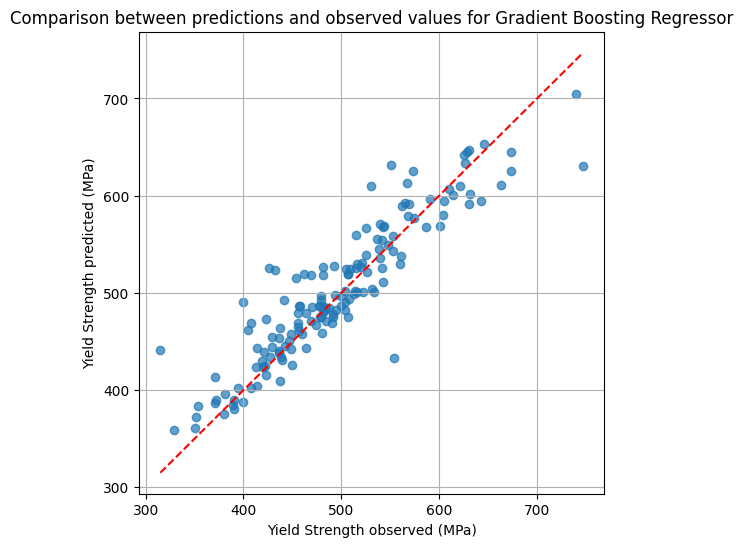

,MAE,MSE,R²
Gradient Boosting Regressor,22.831967,32.845145,0.830643
Random Forest,21.405818,33.970736,0.818837


In [7]:
models = {
    "Random Forest": RandomForestRegressor(
        n_estimators=300, 
        random_state=42
        ),
    "Gradient Boosting Regressor": HistGradientBoostingRegressor(
        learning_rate=0.1, 
        max_iter=300, 
        max_depth=6, 
        min_samples_leaf=20,
        l2_regularization=0.1,
        early_stopping=True,
        validation_fraction=0.1,
        random_state=42
        )
}

results = {}
for name, model in models.items():
    model.fit(X_train_labelled, y_train_labelled)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "MSE": rmse, "R²": r2}
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Yield Strength observed (MPa)")
    plt.ylabel("Yield Strength predicted (MPa)")
    plt.title(f"Comparison between predictions and observed values for {name}")
    plt.grid(True)
    plt.show()

pd.DataFrame(results).T.sort_values("R²", ascending=False)


Fine-tuning of the two models, to try and better the results :

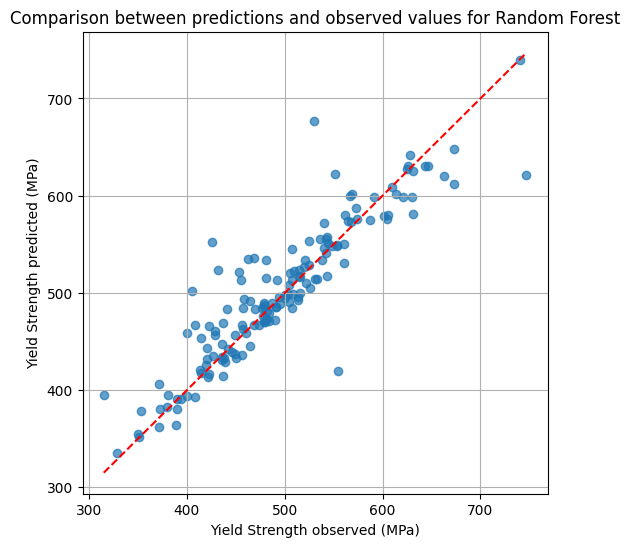

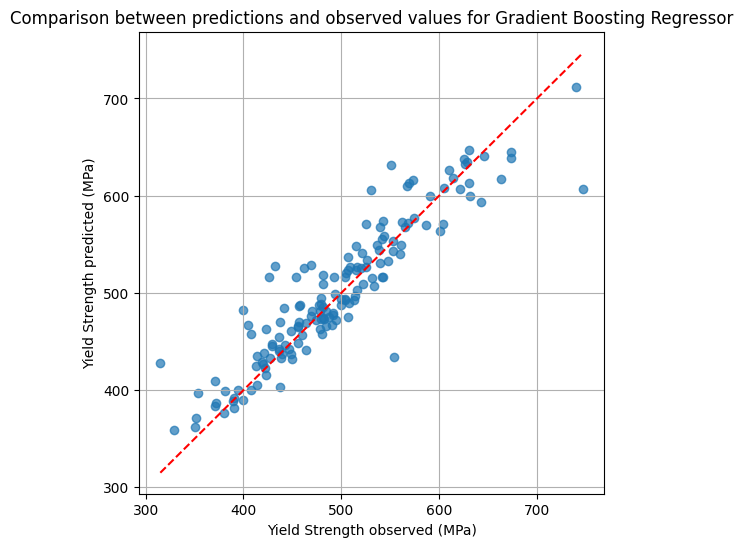

,MAE,MSE,R²
Gradient Boosting Regressor,22.009919,32.130143,0.837936
Random Forest,21.206951,33.852494,0.820096


In [8]:
models = {
    "Random Forest": RandomForestRegressor(
        n_estimators=200, # Testing with less trees : increases rapidity, but maintains stability while bettering the results 
        random_state=42
        ),
    "Gradient Boosting Regressor": HistGradientBoostingRegressor(
        learning_rate=0.15, # Increasing the learning rate
        max_iter=600, # Increasing the number of iterations
        max_depth=5, 
        min_samples_leaf=20,
        l2_regularization=0.1,
        early_stopping=True,
        validation_fraction=0.1,
        random_state=42
        )
}

results = {}
for name, model in models.items():
    model.fit(X_train_labelled, y_train_labelled)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "MSE": rmse, "R²": r2}
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Yield Strength observed (MPa)")
    plt.ylabel("Yield Strength predicted (MPa)")
    plt.title(f"Comparison between predictions and observed values for {name}")
    plt.grid(True)
    plt.show()

pd.DataFrame(results).T.sort_values("R²", ascending=False)